# Plant Disesase

In [ ]:
import pandas
import tensorflow as tf
from pathlib import Path

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
% cd /content/gdrive/My Drive/plant_disease/potato

/content/gdrive/My Drive/plant_disease/potato


In [ ]:
! pwd

/content/gdrive/My Drive/plant_disease/potato


### Load Data

In [ ]:
import os

# eksplorasi direktori dataset
for dirpath, dirnames, filenames in os.walk("."):
  print(f"Ada {len(dirnames)} folder dan {len(filenames)} gambar di direktori {dirpath}")

Ada 3 folder dan 0 gambar di direktori .
Ada 4 folder dan 0 gambar di direktori ./valid
Ada 0 folder dan 456 gambar di direktori ./valid/Potato___healthy
Ada 0 folder dan 485 gambar di direktori ./valid/Potato___Early_blight
Ada 0 folder dan 485 gambar di direktori ./valid/Potato___Late_blight
Ada 0 folder dan 249 gambar di direktori ./valid/Unknown
Ada 4 folder dan 0 gambar di direktori ./train
Ada 0 folder dan 1939 gambar di direktori ./train/Potato___Late_blight
Ada 0 folder dan 1824 gambar di direktori ./train/Potato___healthy
Ada 0 folder dan 1939 gambar di direktori ./train/Potato___Early_blight
Ada 0 folder dan 177 gambar di direktori ./train/Unknown
Ada 4 folder dan 0 gambar di direktori ./test
Ada 0 folder dan 495 gambar di direktori ./test/Potato___Late_blight
Ada 0 folder dan 485 gambar di direktori ./test/Potato___Early_blight
Ada 0 folder dan 456 gambar di direktori ./test/Potato___healthy
Ada 0 folder dan 126 gambar di direktori ./test/Unknown


In [ ]:
import pathlib
import numpy as np
train_potato = pathlib.Path("/train")
class_names = np.array(sorted([item.name for item in train_potato.glob('*')]))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  # ambil sembarang gambar
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Ukuran Gambar: {img.shape}")
  return img

Ukuran Gambar: (256, 256, 3)


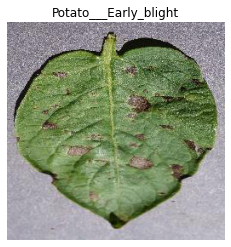

In [ ]:
img = view_random_image(target_dir='test/',
                        target_class='Potato___Early_blight')

### Preprocessing 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(46)

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir = 'train/'
test_dir = 'test/'

In [ ]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(150, 150),
                                               class_mode='categorical',
                                               seed=46,
                                               subset='training')

valid_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(150, 150),
                                               class_mode='categorical',
                                               seed=46,
                                               subset='validation')  


Found 4706 images belonging to 4 classes.
Found 1173 images belonging to 4 classes.


In [ ]:
test_data = train_datagen.flow_from_directory(test_dir,
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 1562 images belonging to 4 classes.


In [ ]:
train_data.class_indices

{'Potato___Early_blight': 0,
 'Potato___Late_blight': 1,
 'Potato___healthy': 2,
 'Unknown': 3}

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten 

# Define Model

In [ ]:
# modelling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

model = Sequential([
        Conv2D(16, 3, activation='relu', input_shape=(150, 150, 3)),
        Dropout(0.3),
        BatchNormalization(),
        MaxPool2D(2),
        Conv2D(32, 3, activation='relu'),
        Dropout(0.3),
        BatchNormalization(),
        MaxPool2D(2),
        # Conv2D(32, 3, activation='relu'),
        # Dropout(0.5),
        # Conv2D(128, 3, activation='relu'),
        # Dropout(0.5),
        MaxPool2D(2),
        GlobalAveragePooling2D(),
        Flatten(),
        Dense(16, activation='relu'),
        Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 dropout_8 (Dropout)         (None, 148, 148, 16)      0         
                                                                 
 batch_normalization_6 (Batc  (None, 148, 148, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 dropout_9 (Dropout)         (None, 72, 72, 32)       

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.00001),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data,
                    epochs=100,
                    verbose=1,
                    validation_data=valid_data)

Epoch 1/100
143/143 [==============================] - 15s 99ms/step - loss: 1.1528 - accuracy: 0.4150 - val_loss: 1.1214 - val_accuracy: 0.3603
Epoch 2/100
143/143 [==============================] - 14s 98ms/step - loss: 1.0277 - accuracy: 0.4809 - val_loss: 1.1784 - val_accuracy: 0.3594
Epoch 3/100
143/143 [==============================] - 14s 97ms/step - loss: 0.9416 - accuracy: 0.5664 - val_loss: 1.1186 - val_accuracy: 0.3620
Epoch 4/100
143/143 [==============================] - 14s 95ms/step - loss: 0.8742 - accuracy: 0.6413 - val_loss: 1.0611 - val_accuracy: 0.3770
Epoch 5/100
143/143 [==============================] - 14s 95ms/step - loss: 0.8186 - accuracy: 0.7103 - val_loss: 1.0212 - val_accuracy: 0.3928
Epoch 6/100
143/143 [==============================] - 14s 94ms/step - loss: 0.7727 - accuracy: 0.7588 - val_loss: 0.9995 - val_accuracy: 0.4104
Epoch 7/100
143/143 [==============================] - 14s 95ms/step - loss: 0.7320 - accuracy: 0.7894 - val_loss: 0.9962 - val_ac

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

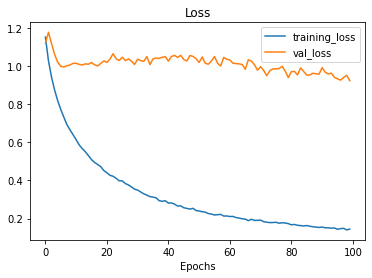

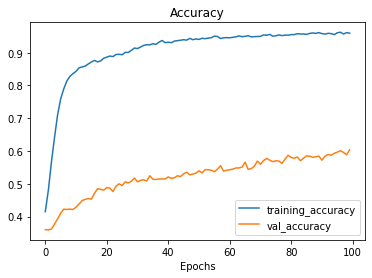

In [ ]:
plot_loss_curves(history)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
def evaluate_model(model, test_data):
    
    results = model.evaluate(test_data, verbose=0)
    loss = results[0]
    acc = results[1]
    
    print("    Test Loss: {:.5f}".format(loss))
    print("Test Accuracy: {:.2f}%".format(acc * 100))
    
    y_pred = np.squeeze((model.predict(test_data) >= 0.5).astype(np.int))
    cm = confusion_matrix(test_data.labels, y_pred)
    clr = classification_report(test_data.labels, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

In [ ]:
result = model.evaluate(test_data)
print(f'loss : {result[0]}')
print(f'accuracy : {result[1]}')

45/45 [==============================] - 4s 77ms/step - loss: 0.9066 - accuracy: 0.5961
loss : 0.9066045880317688
accuracy : 0.5961002707481384


In [ ]:
class_name = ['Early Blight', 'Late Blight', 'Healthy', 'Unknown']

In [ ]:
val_data = valid_data.next()
res = model.predict(val_data[0])
print(classification_report(np.argmax(val_data[1], axis=1), np.argmax(res, axis=1), target_names=class_name))

              precision    recall  f1-score   support

Early Blight       1.00      0.27      0.43        11
 Late Blight       0.43      1.00      0.61        10
     Healthy       1.00      0.55      0.71        11

    accuracy                           0.59        32
   macro avg       0.81      0.61      0.58        32
weighted avg       0.82      0.59      0.58        32



In [ ]:
model.save('/content/potato_base_model.h5')

In [ ]:
print(:ajhfairiiaui@#$@%2536346)

# Resnet

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
base_model_tf=ResNet50(include_top=False,weights='imagenet',input_shape=(150,150,3),classes=38)

In [ ]:
from keras.layers import Input
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
from keras.models import Sequential,load_model,Model

In [ ]:
base_model_tf.trainable=False

pt=Input(shape=(150,150,3))
func=tf.cast(pt,tf.float32)
x=preprocess_input(func) #This function used to zero-center each color channel wrt Imagenet dataset
model_resnet=base_model_tf(x,training=False)
model_resnet=GlobalAveragePooling2D()(model_resnet)
# model_resnet=Dense(32,activation='relu')(model_resnet)
# model_resnet = Dropout(0.5)(model_resnet)
# model_resnet=Dense(64,activation='relu')(model_resnet)
# model_resnet = Dropout(0.5)(model_resnet)
model_resnet=Dense(32,activation='relu')(model_resnet)
model_resnet = Dropout(0.5)(model_resnet)
model_resnet = Flatten()(model_resnet)
model_resnet=Dense(4,activation='softmax')(model_resnet)


model_main=Model(inputs=pt,outputs=model_resnet)
model_main.summary()

In [ ]:
model_main.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history1 = model_main.fit(train_data,validation_data=valid_data,epochs=100,steps_per_epoch=100,verbose=1)

In [ ]:
plot_loss_curves(history1)

In [ ]:
result = model_main.evaluate(test_data)
print(f'loss : {result[0]}')
print(f'accuracy : {result[1]}')

# VGG16

In [ ]:
base_model_m = tf.keras.applications.MobileNet(weights="imagenet",input_shape=(150,150,3),include_top=False)  

In [ ]:
base_model_m.summary()

In [ ]:
# Freeze the base_model_m
base_model_m.trainable = False

# Create new model on top
inputs = tf.keras.Input(shape=(150, 150, 3))

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model_m is running in inference mode here.
x = base_model_m(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x =  Dense(128,activation='relu')(x)
x =  Dense(64,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = tf.keras.layers.Dense(3)(x)

mobilenet_model = tf.keras.Model(inputs, outputs, name='pretrained_mobilenet')
mobilenet_model.summary()

In [ ]:
mobilenet_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])


epochs = 100

mobilenet_history = mobilenet_model.fit(train_data,
                                        steps_per_epoch=50,  # use 150 random batches (= 4800 samples) for training
                                        validation_data=valid_data,
                                        epochs=epochs,
                                        validation_steps=100,  # use 100 random batches (= 3200 samples) for validation 
)

In [ ]:
train_data.class_indices

In [ ]:
plot_loss_curves(mobilenet_history)

# mobilenet


In [ ]:
mobilenet = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(150, 150, 3), pooling='avg')
mobilenet.trainable = False

In [ ]:
model3 = Sequential()
model3.add(mobilenet)
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(4, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model3.fit(train_data, validation_data=valid_data, epochs=10, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)])

Epoch 1/10
148/148 [==============================] - 18s 106ms/step - loss: 0.3928 - accuracy: 0.8642 - val_loss: 0.1708 - val_accuracy: 0.9463
Epoch 2/10
148/148 [==============================] - 15s 101ms/step - loss: 0.1429 - accuracy: 0.9554 - val_loss: 0.1199 - val_accuracy: 0.9676
Epoch 3/10
148/148 [==============================] - 15s 100ms/step - loss: 0.1101 - accuracy: 0.9649 - val_loss: 0.1275 - val_accuracy: 0.9582
Epoch 4/10
148/148 [==============================] - 15s 100ms/step - loss: 0.0857 - accuracy: 0.9726 - val_loss: 0.1400 - val_accuracy: 0.9574


In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense_4 (Dense)             (None, 32)                40992     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 2,299,108
Trainable params: 41,124
Non-trainable params: 2,257,984
_______________________________________

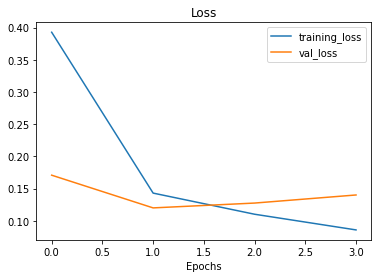

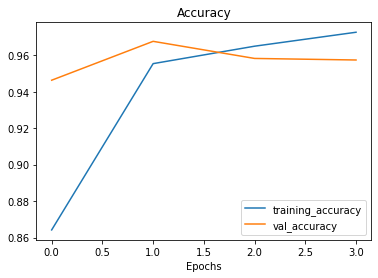

In [ ]:
plot_loss_curves(history3)

In [ ]:
result = model3.evaluate(test_data)
print(f'loss : {result[0]}')
print(f'accuracy : {result[1]}')

49/49 [==============================] - 5s 98ms/step - loss: 0.3368 - accuracy: 0.9251
loss : 0.33677348494529724
accuracy : 0.9250960350036621


In [ ]:
val_data = valid_data.next()
res = model3.predict(val_data[0])
print(classification_report(np.argmax(val_data[1], axis=1), np.argmax(res, axis=1), target_names=class_name))

              precision    recall  f1-score   support

Early Blight       1.00      1.00      1.00         8
 Late Blight       0.90      1.00      0.95         9
     Healthy       1.00      1.00      1.00        11
     Unknown       1.00      0.75      0.86         4

    accuracy                           0.97        32
   macro avg       0.97      0.94      0.95        32
weighted avg       0.97      0.97      0.97        32



In [ ]:
model3.save('/content/potato_models.h5')